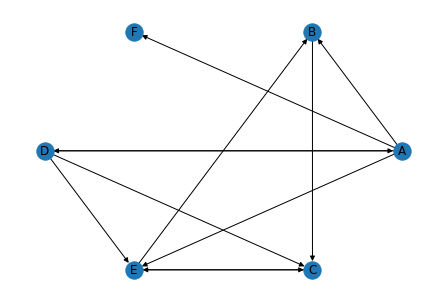

简化模型的PR值： {'A': 1.120172696367921e-12, 'B': 0.20000070484715923, 'F': 1.0004820824274787e-12, 'D': 1.0004820824274787e-12, 'E': 0.39999949911797406, 'C': 0.3999997960317455}
随机模型的PR值： {'A': 0.041774040616370404, 'B': 0.18640468022979165, 'F': 0.0394683305720884, 'D': 0.0394683305720884, 'E': 0.34573196175894116, 'C': 0.34715265625071984}


In [3]:
########## Page Rank ###########

# 使用networkX计算节点的pagerank
import networkx as nx
# import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()   
# 设置有向图的边集合
edges = [("A", "B"), ("A", "F"), ("A", "D"), ("A", "E"), ("B", "C"), ("C", "E"), ("D", "A"), ("D", "C"), ("D", "E"), ("E", "B"), ("E", "C") ]
# 在有向图G中添加边集合
for edge in edges:
    G.add_edge(edge[0], edge[1])

# 有向图可视化
nx.draw_shell(G, with_labels=True)
# layout = nx.spring_layout(G)
# nx.draw(G, pos=layout, with_labels=True, hold=False)
plt.show()

# 计算简化模型的PR值
pr = nx.pagerank(G, alpha=1)
print("简化模型的PR值：", pr)

# 计算随机模型的PR值
pr = nx.pagerank(G, alpha=0.85)
print("随机模型的PR值：", pr)# 使用networkX计算节点的pagerank


In [24]:
########## Text Rank ###########

# text = """今天，武汉市教育局发出《关于延迟2020年春季开学时间有关工作的通知》，延迟全市中小学、市属大中专院校2020年春季开学时间。
# 具体开学时间将视武汉市新冠肺炎疫情发展和防控情况，请示上级同意后另行通知。
# 2月10日前，各单位严格按照要求，做好假期各项工作。
# 2月10日开始，各区教育局组织辖区中小学、中职学校，按照教学计划安排，开展在线课程教学（方案另发）。
# 正式开学前，严禁市属各级各类学校组织各类线下课程教学、培训和集体活动。
# 各区教育局要指导辖区中小学、幼儿园，合理制定学生学习计划和生活指南，指导学生安排好居家学习和生活；要关注学生心理健康，建立离校学生情况日报制度，定期向学生了解相关情况，通过电话、网络等各种方式做好学生的个性化辅导。
# """

text = """
土耳其未炮击美军 土耳其向美军开战
当地时间11日，一支美国特种部队遭到了土耳其的炮弹袭击，《新闻周刊》称这明显是“误伤”。五角大楼一名高级官员说，土耳其军队的炮击非常猛烈，美国人员曾考虑进行还击是出于自卫。
《新闻周刊》10月11日报道，一名库尔德情报官员和五角大楼官员均表示，在库尔德人占多数的城市科巴尼的山上，这支特种部队在执行任务时遭到炮击，炮弹落在离驻扎地几百米远的地方，没有美国士兵受伤。
报道称，特种部队没有还击，而是在炮击停止后撤退。《新闻周刊》此前曾在周三报道说，目前美国军队的交战规则仍然以自卫为中心，五角大楼还没有发布全面撤出叙利亚的命令。
这名五角大楼官员说，土耳其部队应该了解美国的位置，不过，这名官员没有具体说明在场人员的确切人数，但表示大约在15到100人之间。《新闻周刊》已联系五角大楼就此事发表评论。
土耳其国防部针对《新闻周刊》的报道发表了一份声明，否认土耳其军队针对美国军队。土耳其国防部证实说，“土耳其在苏鲁奇以南的边境哨所，受到了来自美国一个观察哨西南方向大约1千米处山丘的迫击炮攻击。”
为了自卫，双方对袭击的恐怖分子阵地进行了还击。土耳其没有以任何方式向美国观察哨开火。他说：所有的预防措施都是在开火之前采取的，目的是防止对美军基地造成任何伤害。作为预防措施，我们在收到来自美国的信息后立即停火。我们坚决反对美国或联军部队遭到袭击的说法。
特朗普周四曾在社交媒体上表示，他有“三种选择之一：派遣数千名士兵并在军事上取胜，在经济上对土耳其进行严厉打击并实施制裁，或者在土耳其和库尔德人之间斡旋达成协议”
土耳其总统埃尔多安早就警告说，他将猛攻边境，建立一个所谓的“安全区”。白宫周日宣布，美国军队将在一旁待命。
"""

#-*- encoding:utf-8 -*-
# !pip install textrank4zh
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import jieba


# 输出关键词，设置文本小写，窗口为2
keywords = jieba.analyse.extract_tags(text,topK=20, withWeight=True)
for item in keywords:
  print(item)

# tr4w = TextRank4Keyword()
# tr4w.analyze(text=text, lower=True, window=3)
# print('关键词：')
# for item in tr4w.get_keywords(20, word_min_len=2):
#     print(item.word, item.weight)

# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
	# index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

('土耳其', 0.40245173302695836)
('五角大楼', 0.22427465491666665)
('新闻周刊', 0.20295405351291665)
('美国', 0.1731915096525)
('炮击', 0.16289238778216666)
('还击', 0.11978986923049997)
('军队', 0.118758112326875)
('特种部队', 0.116193843324875)
('观察哨', 0.11583898043333334)
('自卫', 0.103279037283)
('11', 0.09962306252416667)
('报道', 0.09800678631933332)
('官员', 0.09716285938649999)
('库尔德人', 0.09273407441416667)
('袭击', 0.090743693528)
('开火', 0.08008515175691668)
('预防措施', 0.07932209181083333)
('遭到', 0.077762050150125)
('这名', 0.07256434000908334)
('国防部', 0.06915465692583332)
摘要：
2 0.08591468923918809 五角大楼一名高级官员说，土耳其军队的炮击非常猛烈，美国人员曾考虑进行还击是出于自卫
5 0.0783434449568913 《新闻周刊》此前曾在周三报道说，目前美国军队的交战规则仍然以自卫为中心，五角大楼还没有发布全面撤出叙利亚的命令
6 0.07572455879841139 这名五角大楼官员说，土耳其部队应该了解美国的位置，不过，这名官员没有具体说明在场人员的确切人数，但表示大约在15到100人之间


defaultdict(<class 'list'>, {('Jake Sullivan', 'Hillary Clinton'): 815, ('nan', 'Hillary Clinton'): 20, ('Cheryl Mills', ';h'): 1, ('Cheryl Mills', 'Hillary Clinton'): 1182, ('Hillary Clinton', 'Huma Abedin'): 32, ('Hillary Clinton', 'russorv'): 26, ('slaughter anne-marie', 'Hillary Clinton'): 126, ('Harold Hongju Koh', 'Hillary Clinton'): 12, ('Wendy Sherman', 'Hillary Clinton'): 7, ('Jake Sullivan', 'Wendy Sherman'): 1, ('Hillary Clinton', 'sullivanjj'): 288, ('Sidney Blumenthal', 'Hillary Clinton'): 361, ('Burns Strider', 'Hillary Clinton'): 2, ('Huma Abedin', 'Hillary Clinton'): 1322, ('Cheryl Mills', 'Cheryl Mills'): 17, ('Robert Russo', 'Hillary Clinton'): 22, ('Capricia Marshall', 'Cheryl Mills'): 2, ('Hillary Clinton', 'Oscar Flores'): 5, ('William Burns', 'Hillary Clinton'): 10, ('Monica Hanley', 'Hillary Clinton'): 24, ('Hillary Clinton', 'abedinh'): 345, ('Hillary Clinton', 'millscd'): 298, ('Daniel Schwerin', 'Hillary Clinton'): 9, ('Hillary Clinton', 'hanleymr'): 33, ('Mon

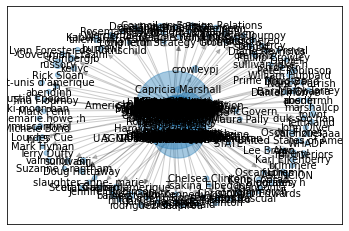

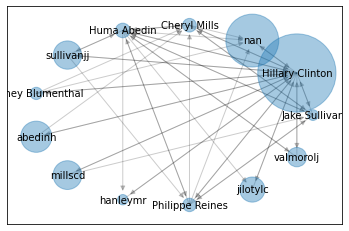

In [5]:
######## Hilarry Emails ########

# -*- coding: utf-8 -*-
# 用PageRank挖掘希拉里邮件中的重要任务关系
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# 数据加载
emails = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/Emails.txt")
# 读取别名文件
file = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/Aliases.txt")
aliases = {}
for index, row in file.iterrows():
    aliases[row['Alias']] = row['PersonId']
# 读取人名文件
file = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/Persons.txt")
persons = {}
for index, row in file.iterrows():
    persons[row['Id']] = row['Name']

# 针对别名进行转换        
def unify_name(name):
    # 姓名统一小写
    name = str(name).lower()
    # 去掉, 和@后面的内容
    name = name.replace(",","").split("@")[0]
    # 别名转换
    if name in aliases.keys():
        return persons[aliases[name]]
    return name
# 画网络图
def show_graph(graph, type = 'spring_layout'):
    if type == 'spring_layout':
        # 使用Spring Layout布局，类似中心放射状
        positions=nx.spring_layout(graph)
    if type == 'circular_layout':
        # 使用Circular Layout布局，在一个圆环上均匀分布
        positions=nx.circular_layout(graph)

    # 设置网络图中的节点大小，大小与pagerank值相关，因为pagerank值很小所以需要*20000
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)]
    # 设置网络图中的边长度
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)]
    # 绘制节点
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    # 绘制边
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    # 绘制节点的label
    nx.draw_networkx_labels(graph, positions, font_size=10)
    # 输出希拉里邮件中的所有人物关系图
    plt.show()

# 将寄件人和收件人的姓名进行规范化
emails.MetadataFrom = emails.MetadataFrom.apply(unify_name)
emails.MetadataTo = emails.MetadataTo.apply(unify_name)

# 设置遍的权重等于发邮件的次数
edges_weights_temp = defaultdict(list)
for row in zip(emails.MetadataFrom, emails.MetadataTo, emails.RawText):
    temp = (row[0], row[1])
    if temp not in edges_weights_temp:
        edges_weights_temp[temp] = 1
    else:
        edges_weights_temp[temp] = edges_weights_temp[temp] + 1

print(edges_weights_temp)
print('-'*100)
# 转化格式 (from, to), weight => from, to, weight
edges_weights = [(key[0], key[1], val) for key, val in edges_weights_temp.items()]

# 创建一个有向图
graph = nx.DiGraph()
# 设置有向图中的路径及权重(from, to, weight)
graph.add_weighted_edges_from(edges_weights)
# 计算每个节点（人）的PR值，并作为节点的pagerank属性
pagerank = nx.pagerank(graph)
# 获取每个节点的pagerank数值
pagerank_list = {node: rank for node, rank in pagerank.items()}
# 将pagerank数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank_list)
# 画网络图
show_graph(graph)

# 将完整的图谱进行精简
# 设置PR值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉PR值小于pagerank_threshold的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph, 'circular_layout')